<a href="https://colab.research.google.com/github/QuantLet/Tukey/blob/master/TukeyQQ/TukeyQQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

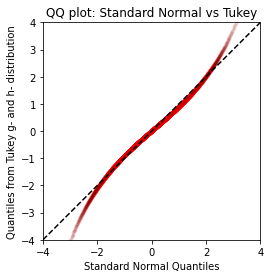

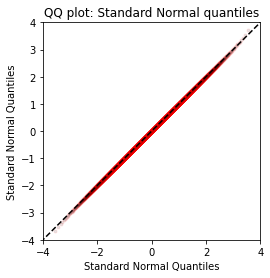

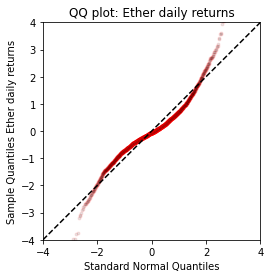

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab
import pandas as pd
from scipy.stats import norm
from google.colab import files
from google.colab import drive 
from sklearn.preprocessing import StandardScaler
drive.mount("/content/gdrive")

#Tukey QQs

x = np.linspace(0.00001,0.99999,10000)
y = norm.ppf(x)
g=-0.0252
h=0.0888
x =(1/g)*np.exp(h*y**2/2)*(np.exp(g*y)-1)
pp = sm.ProbPlot(x, fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='k', markeredgecolor='r', alpha=0.1)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Standard Normal Quantiles')
plt.ylabel('Quantiles from Tukey g- and h- distribution')
plt.title('QQ plot: Standard Normal vs Tukey')
plt.savefig("tukeyqq.png")
files.download("tukeyqq.png") 


#Standard Normal QQs

x = np.linspace(0.00001,0.999999,10000)
y = norm.ppf(x)
pp = sm.ProbPlot(y, fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='k', markeredgecolor='r', alpha=0.1)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.gca().set_aspect('equal', adjustable='box')
plt.ylabel('Standard Normal Quantiles')
plt.xlabel('Standard Normal Quantiles')
plt.title('QQ plot: Standard Normal quantiles')
plt.savefig("snqq.png")
files.download("snqq.png") 

#Crypto returns 

standard_scaler = StandardScaler()
ether_data = pd.read_csv("gdrive/My Drive/etherprice.csv")

ether_data["daily_returns"] = ether_data["Value"].pct_change(1) + 1
#Drop NaNs and infinite values
ether_data.replace([np.inf, -np.inf], np.nan, inplace=True)
ether_data.dropna(inplace = True)

pp = sm.ProbPlot(ether_data["daily_returns"], fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='k', markeredgecolor='r', alpha=0.1)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Standard Normal Quantiles')
plt.ylabel('Sample Quantiles Ether daily returns')
plt.title('QQ plot: Ether daily returns')
plt.savefig("ether_return.png")
files.download("ether_return.png") 


